<a href="https://colab.research.google.com/github/pawanthapaliya01/Bostonhousepricing/blob/main/projects/neurons/load_Allen_Visual_Behavior_from_pre_processed_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allen Institute Visual Behavior 2P dataset overview
### This dataset consists of neural activity measured with 2-photon calcium imaging in the visual cortex of mice performing an image change detection task.
##### In this task, mice learn to report changes in stimulus identity by licking a spout to earn a water reward.


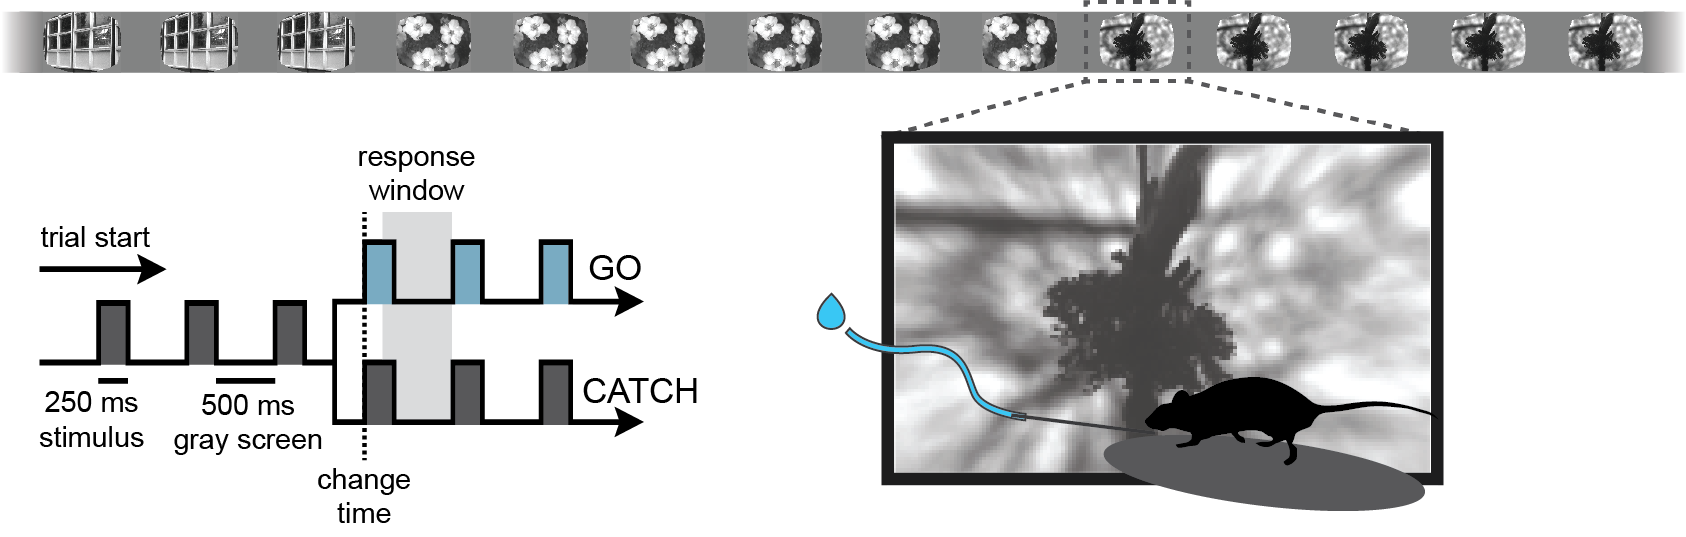

##### In some sessions, the mice perform the task with familiar images they have seen many times during training. In other sessions, mice perform the task with novel images.
##### During 2-photon imaging sessions, 5% of stimulus presentations are randomly omitted, allowing us to examine the effect of unexpected events on neural activity.
##### The same population of cells is imaged over multiple days with varying sensory and behavioral conditions.


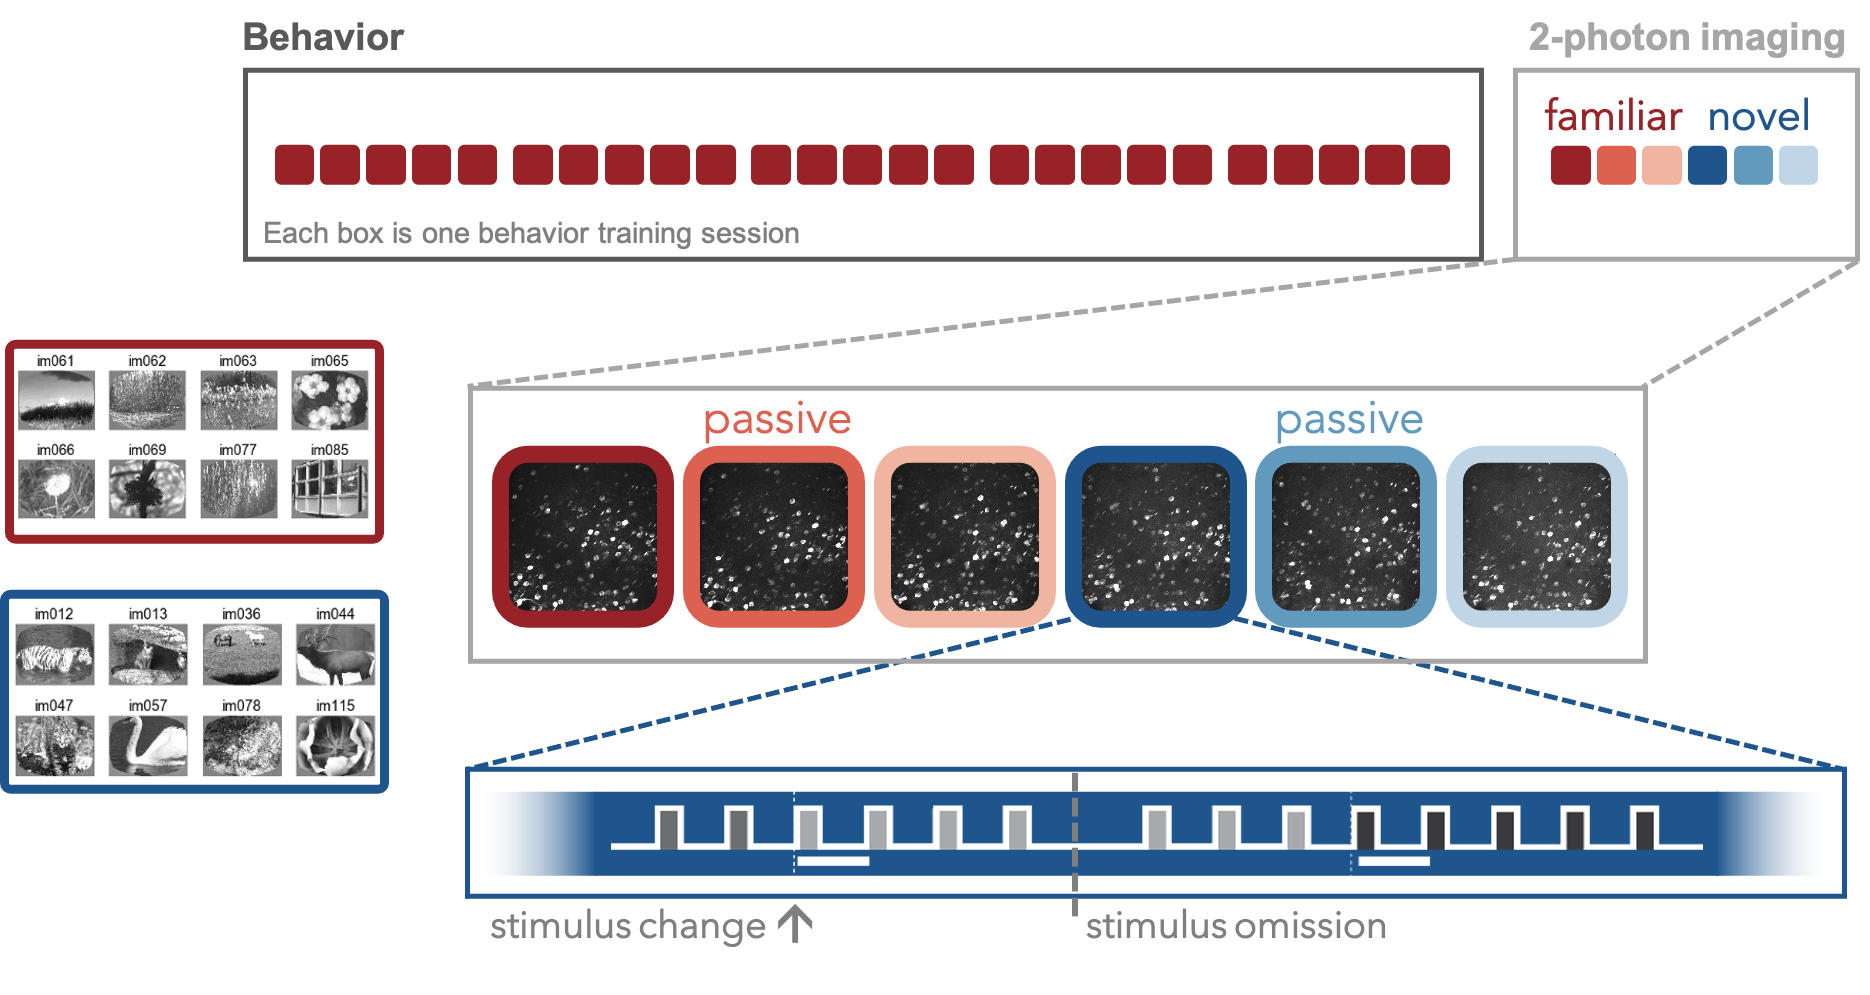

##### Multiple cortical areas and depths were measured concurently in each session, at a sample rate of 11Hz.
##### Data was collected from excitatory and inhibitory neural populations.

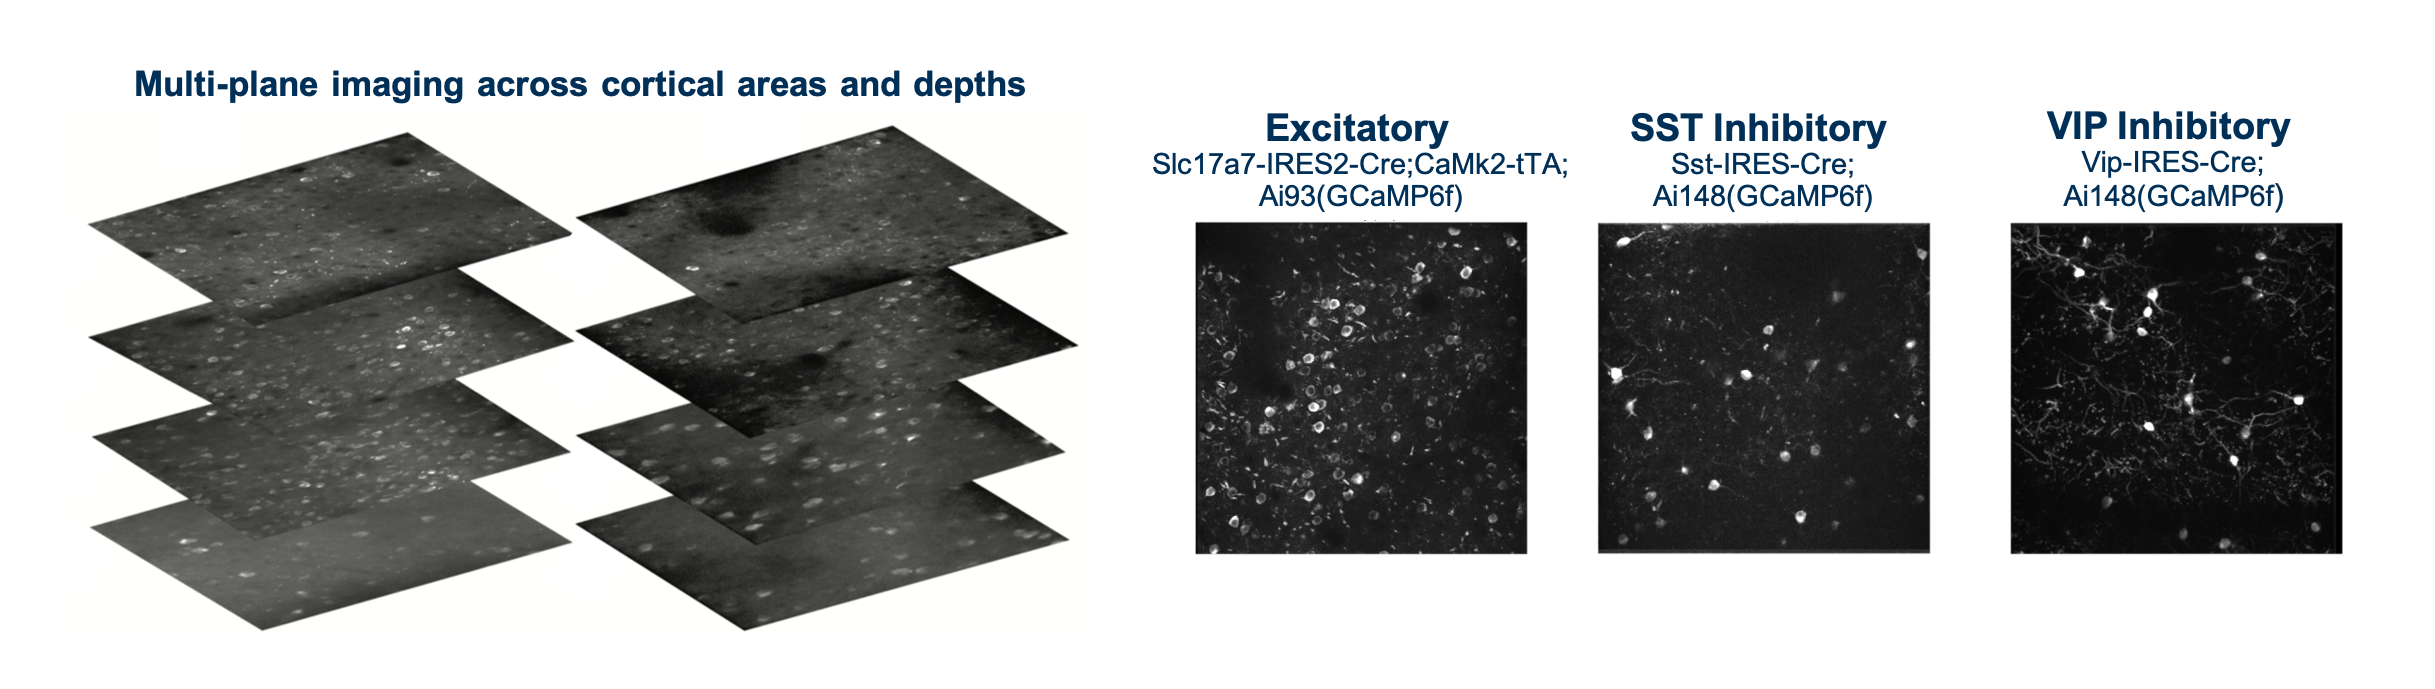

#### You can learn more about this dataset, behavioral task, and find other useful tools here:
#### [Overview page](https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-Ophys.html) and [Allen Brain Atlas](allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html)
#### This example will focus on the activity of the two inhibitory types - VIP and SST neurons.

# Loading the data

In [1]:
# @title Install dependencies

!pip install pandas --quiet
!pip install seaborn --quiet
!pip install  pyarrow # may be needed to read data file

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

## For this example, we have pre-computed event triggered responses and saved them to figshare.
#### To access the full dataset, see `Allen_neuromatch_example_2.ipynb`, or go to the links at the bottom of this notebook
###This cell will download the responses.

In [3]:
# @title Data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

### Then we open it using the pandas `read_parquet` method


(parquet is just another file format)

In [4]:
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename)

#### The data is organized as a pandas dataframe.
#### Each row contains all data for a given cell on a given trial


In [22]:
data.columns

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response', 'image_name',
       'image_index', 'is_change', 'omitted', 'mean_running_speed',
       'mean_pupil_area', 'response_latency', 'rewarded',
       'ophys_experiment_id', 'imaging_depth', 'targeted_structure',
       'cre_line', 'session_type', 'session_number', 'mouse_id',
       'ophys_session_id', 'ophys_container_id', 'behavior_session_id',
       'full_genotype', 'reporter_line', 'driver_line', 'indicator', 'sex',
       'age_in_days', 'exposure_level'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame
relevant_columns = ['mean_running_speed', 'mean_pupil_area', 'response_latency',
                    'mean_response', 'baseline_response']
df_relevant = data[relevant_columns].dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_relevant)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

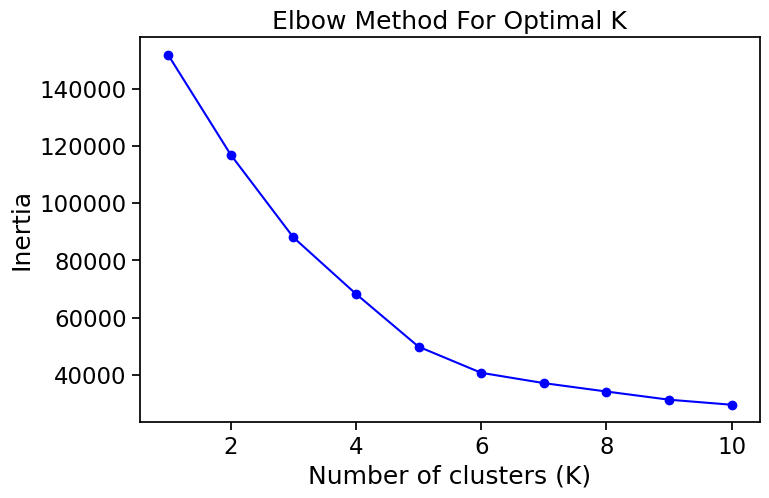

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [32]:
optimal_k = 3  # Replace this with the number determined from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_relevant['cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

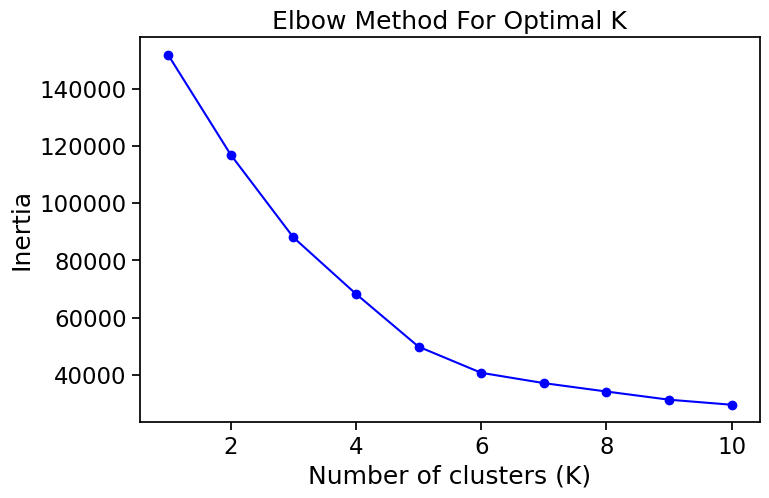

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


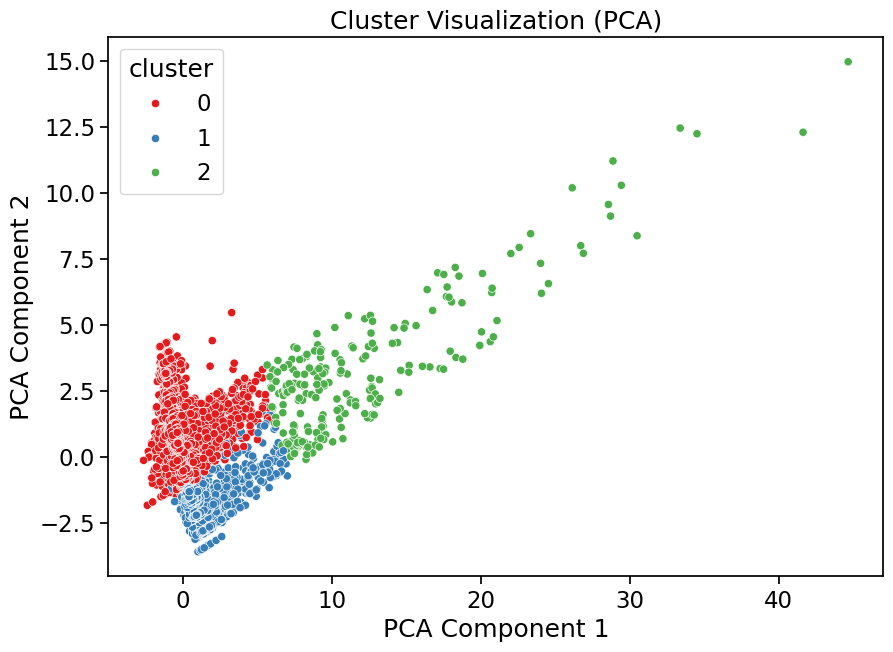

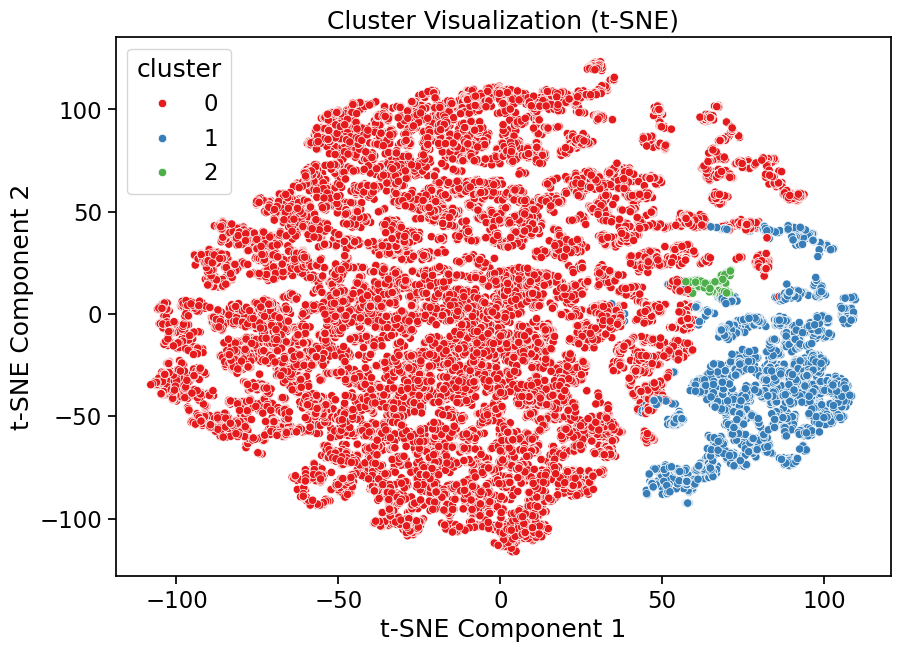

         mean_running_speed  mean_pupil_area  response_latency  mean_response  \
cluster                                                                         
0                  1.693381      7877.174076          0.357071       0.009496   
1                 25.621398      6248.881131          0.549044       0.046267   
2                 12.892436      6459.087077          0.477892       1.085800   

         baseline_response  
cluster                     
0                -0.003232  
1                 0.032331  
2                 1.074196  


In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
relevant_columns = ['mean_running_speed', 'mean_pupil_area', 'response_latency',
                    'mean_response', 'baseline_response']
df_relevant = data[relevant_columns].dropna()

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_relevant)

# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# Assuming optimal K is determined as 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_relevant['cluster'] = kmeans.fit_predict(df_scaled)

# PCA for 2D visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_relevant['pca1'] = df_pca[:, 0]
df_relevant['pca2'] = df_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_relevant, palette='Set1')
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df_scaled)
df_relevant['tsne1'] = df_tsne[:, 0]
df_relevant['tsne2'] = df_tsne[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=df_relevant, palette='Set1')
plt.title('Cluster Visualization (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Cluster summary
cluster_summary = df_relevant.groupby('cluster')[relevant_columns].mean()
print(cluster_summary)

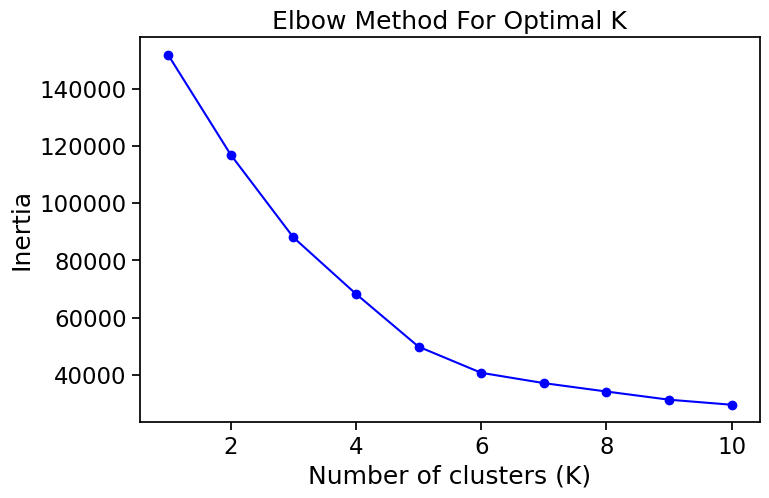

exposure_level  familiar  novel
cluster                        
0.0                 6496   2836
1.0                 2408   1566
2.0                10444   5020
3.0                   90    135
4.0                 1395     23
exposure_level  familiar     novel
cluster                           
0.0             0.696099  0.303901
1.0             0.605939  0.394061
2.0             0.675375  0.324625
3.0             0.400000  0.600000
4.0             0.983780  0.016220


<Figure size 1200x800 with 0 Axes>

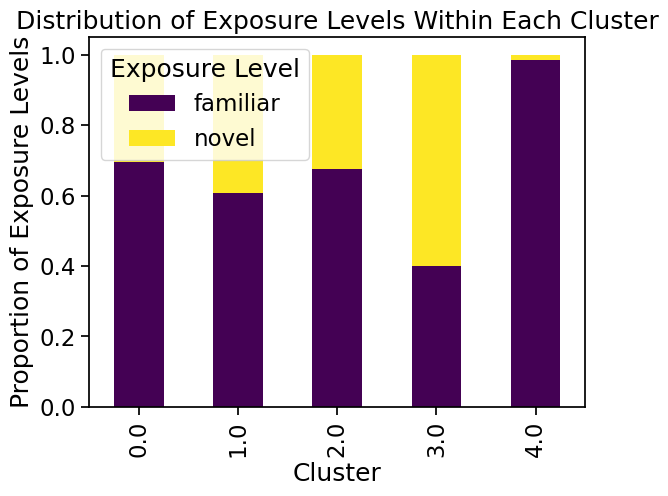

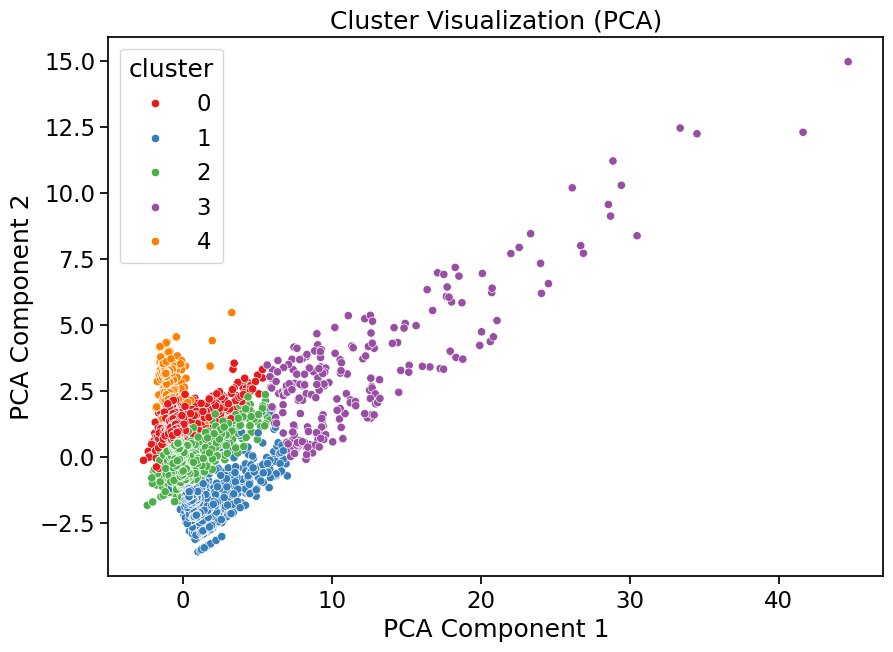

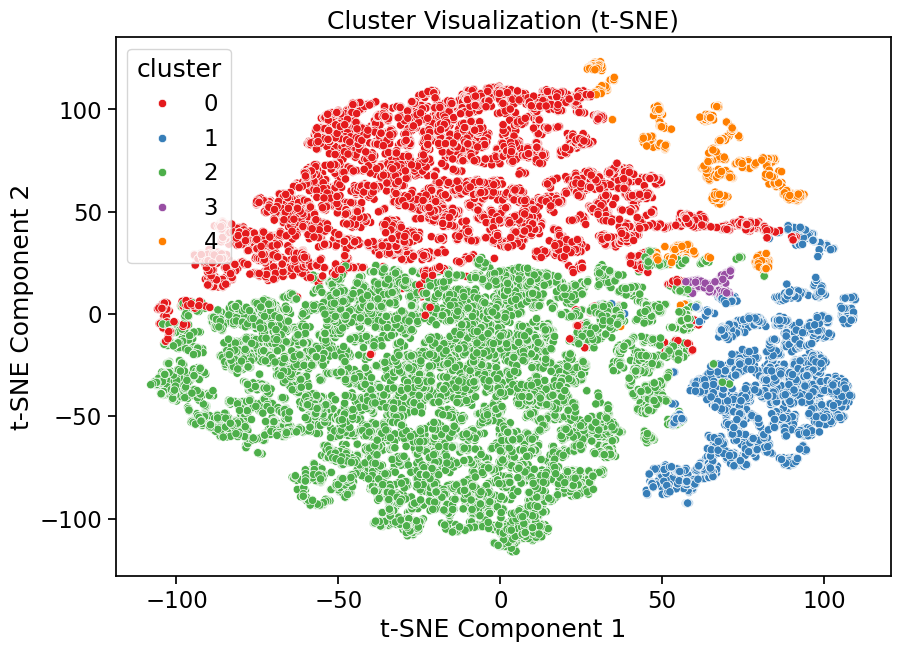

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# relevant columns
relevant_columns = ['mean_running_speed', 'mean_pupil_area', 'response_latency',
                    'mean_response', 'baseline_response']
df_relevant = data[relevant_columns].dropna()

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_relevant)

# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# optimal K is determined from elbow test
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
df_relevant['cluster'] = kmeans.fit_predict(df_scaled)

# Map cluster labels to the original DataFrame
data['cluster'] = pd.Series(index=df_relevant.index, data=df_relevant['cluster'])

# Analyzing the relationship between clusters and exposure level
exposure_cluster_summary = data.groupby(['cluster', 'exposure_level']).size().unstack().fillna(0)
print(exposure_cluster_summary)

# Normalizing to get the proportion of each exposure level within each cluster
exposure_cluster_summary_normalized = exposure_cluster_summary.div(exposure_cluster_summary.sum(axis=1), axis=0)
print(exposure_cluster_summary_normalized)

# Visualizing the distribution of exposure levels within each cluster
plt.figure(figsize=(12, 8))
exposure_cluster_summary_normalized.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Exposure Levels Within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Exposure Levels')
plt.legend(title='Exposure Level')
plt.show()

# PCA for 2D visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_relevant['pca1'] = df_pca[:, 0]
df_relevant['pca2'] = df_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_relevant, palette='Set1')
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df_scaled)
df_relevant['tsne1'] = df_tsne[:, 0]
df_relevant['tsne2'] = df_tsne[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=df_relevant, palette='Set1')
plt.title('Cluster Visualization (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

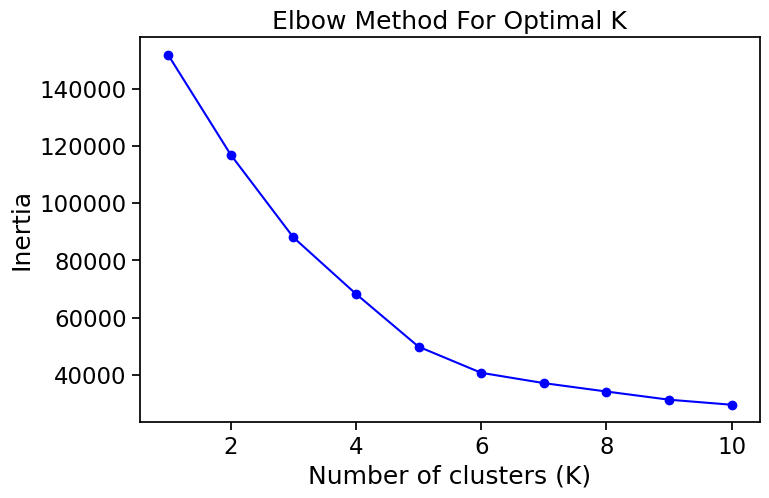

exposure_level  familiar  novel
cluster                        
0.0                 6496   2836
1.0                 2408   1566
2.0                10444   5020
3.0                   90    135
4.0                 1395     23
exposure_level  familiar     novel
cluster                           
0.0             0.696099  0.303901
1.0             0.605939  0.394061
2.0             0.675375  0.324625
3.0             0.400000  0.600000
4.0             0.983780  0.016220


<Figure size 1200x800 with 0 Axes>

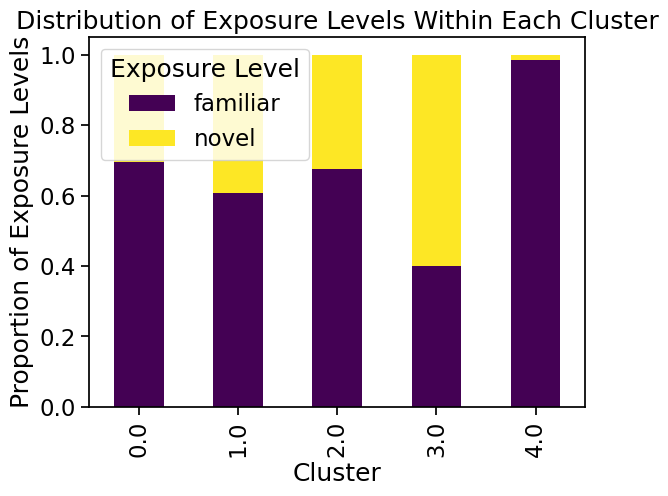

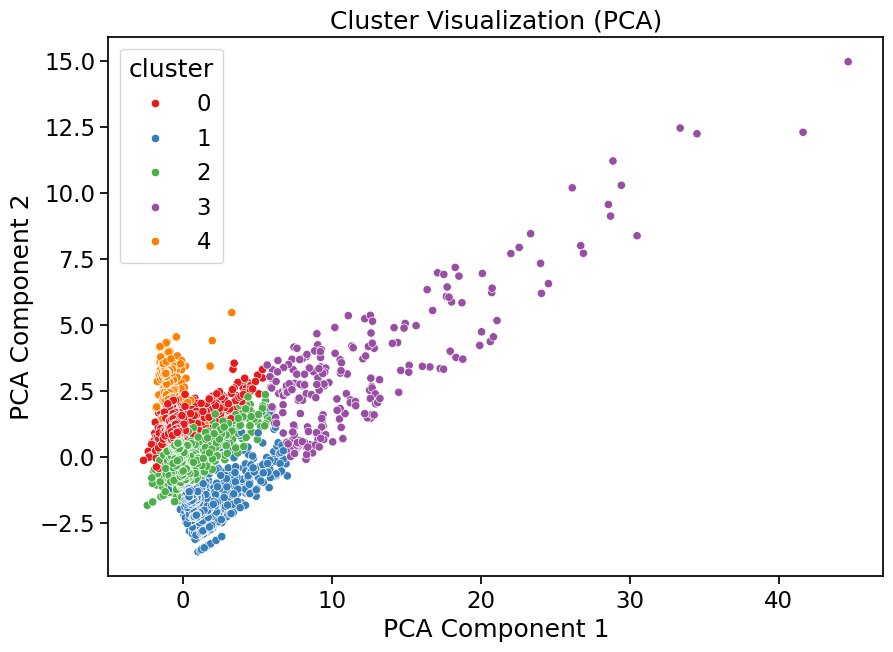

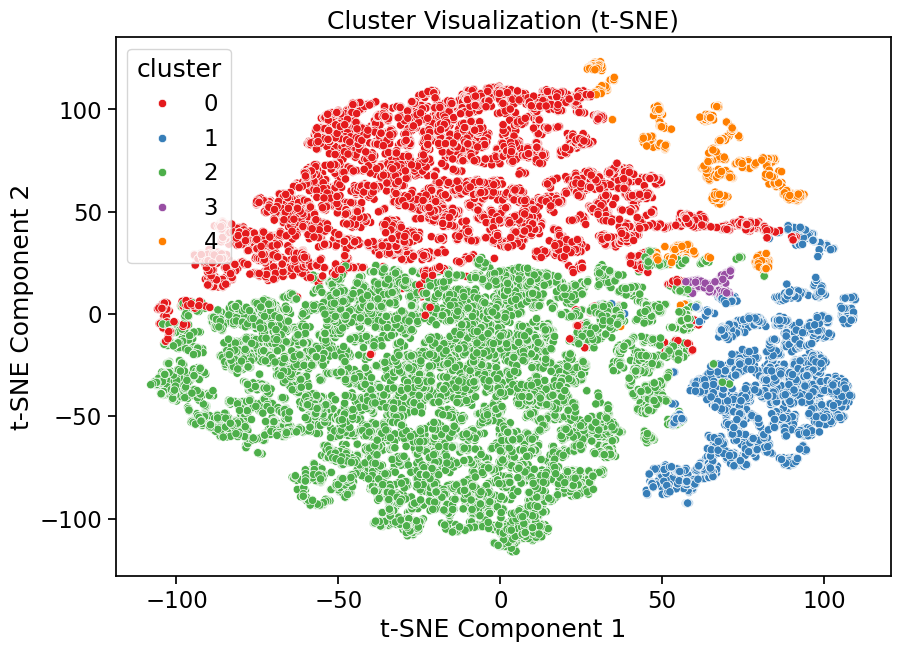

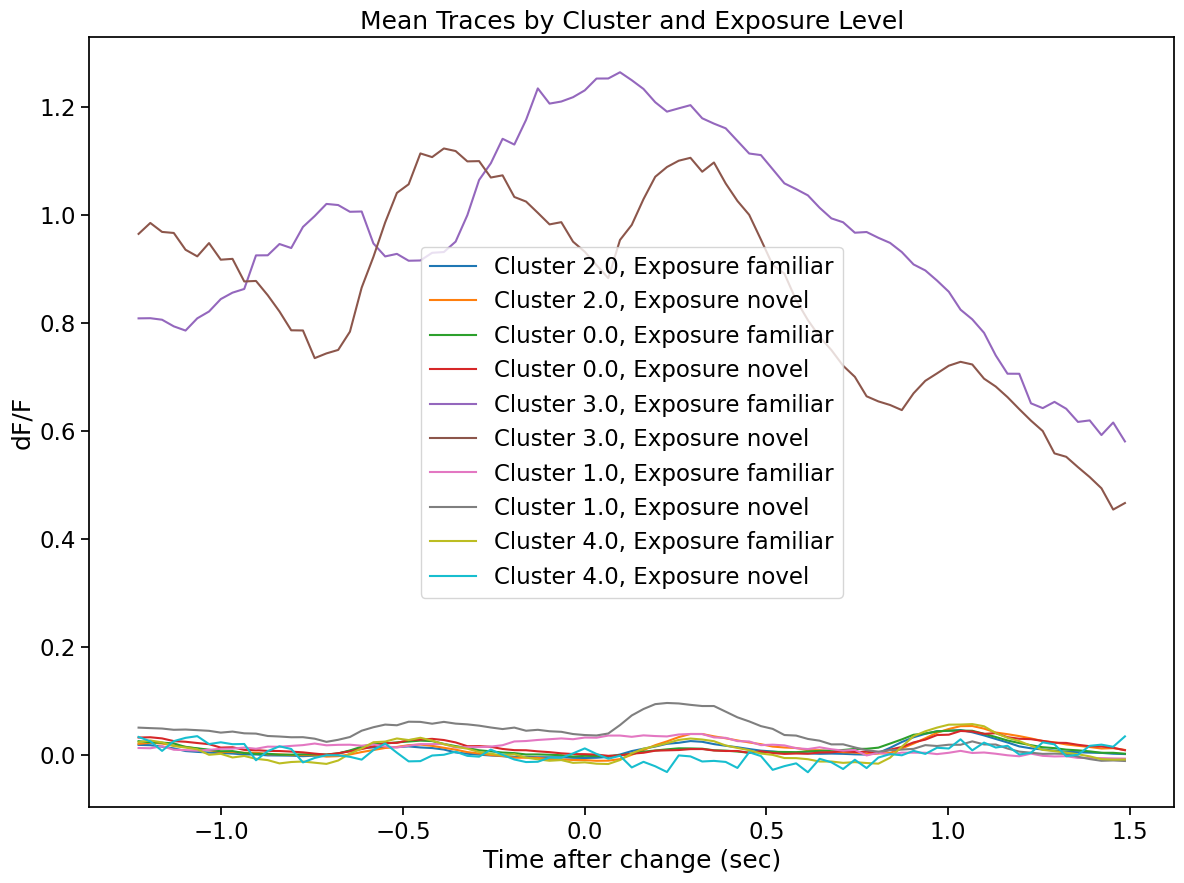

cluster                             0            1             2           3  \
mean_running_speed count  9332.000000  3974.000000  15464.000000  225.000000   
                   mean      3.155302    26.133460      1.086605   12.850683   
                   std       4.217555     5.618294      2.467445   11.414834   
                   min      -2.553963     8.515523     -1.601546   -1.630516   
                   25%       0.385109    22.871994     -0.000294    1.379958   
...                               ...          ...           ...         ...   
tsne2              min     -20.435379   -92.525269   -116.252693    8.571836   
                   25%      39.621944   -55.759430    -59.798368   12.052294   
                   50%      57.347986   -36.153612    -32.422628   15.096252   
                   75%      82.055355   -10.222417     -5.580546   16.577587   
                   max     111.465019    43.302670     30.833055   21.543861   

cluster                             4  

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Relevant columns
relevant_columns = ['mean_running_speed', 'mean_pupil_area', 'response_latency', 'mean_response', 'baseline_response']
data_relevant = data[relevant_columns].dropna()

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_relevant)

# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# Optimal K is determined from elbow test
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
data_relevant['cluster'] = kmeans.fit_predict(data_scaled)

# Map cluster labels to the original DataFrame
data['cluster'] = pd.Series(index=data_relevant.index, data=data_relevant['cluster'])

# Analyzing the relationship between clusters and exposure level
exposure_cluster_summary = data.groupby(['cluster', 'exposure_level']).size().unstack().fillna(0)
print(exposure_cluster_summary)

# Normalizing to get the proportion of each exposure level within each cluster
exposure_cluster_summary_normalized = exposure_cluster_summary.div(exposure_cluster_summary.sum(axis=1), axis=0)
print(exposure_cluster_summary_normalized)

# Visualizing the distribution of exposure levels within each cluster
plt.figure(figsize=(12, 8))
exposure_cluster_summary_normalized.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Exposure Levels Within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Exposure Levels')
plt.legend(title='Exposure Level')
plt.show()

# PCA for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_relevant['pca1'] = data_pca[:, 0]
data_relevant['pca2'] = data_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data_relevant, palette='Set1')
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data_scaled)
data_relevant['tsne1'] = data_tsne[:, 0]
data_relevant['tsne2'] = data_tsne[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=data_relevant, palette='Set1')
plt.title('Cluster Visualization (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Function to visualize mean traces for each cluster based on exposure level
def plot_mean_traces_by_cluster(data, trace_column, timestamps_column, cluster_column, exposure_level_column):
    timestamps = data[timestamps_column].values[0]

    plt.figure(figsize=(14, 10))

    for cluster in data[cluster_column].unique():
        cluster_data = data[data[cluster_column] == cluster]

        for exposure_level in cluster_data[exposure_level_column].unique():
            traces = cluster_data[cluster_data[exposure_level_column] == exposure_level][trace_column].values
            mean_trace = np.mean([trace for trace in traces], axis=0)
            plt.plot(timestamps, mean_trace, label=f'Cluster {cluster}, Exposure {exposure_level}')

    plt.title('Mean Traces by Cluster and Exposure Level')
    plt.xlabel('Time after change (sec)')
    plt.ylabel('dF/F')
    plt.legend()
    plt.show()

# Replace 'trace_column' and 'timestamps_column' with the appropriate columns in your DataFrame
plot_mean_traces_by_cluster(data, 'trace', 'trace_timestamps', 'cluster', 'exposure_level')

# Descriptive statistics for each cluster
cluster_summary = data_relevant.groupby('cluster').describe().T
print(cluster_summary)


         mean_running_speed  mean_pupil_area  response_latency  mean_response  \
cluster                                                                         
0                  1.693381      7877.174076          0.357071       0.009496   
1                 25.621398      6248.881131          0.549044       0.046267   
2                 12.892436      6459.087077          0.477892       1.085800   

         baseline_response  
cluster                     
0                -0.003232  
1                 0.032331  
2                 1.074196  
    mean_running_speed  mean_pupil_area  response_latency  mean_response  \
85            0.000006      5822.220145            0.5004       0.006115   
86            0.000006      5822.220145            0.5004      -0.018832   
87            0.000006      5822.220145            0.5004      -0.041275   
88            0.000006      5822.220145            0.5004       0.039527   
89            0.000006      5822.220145            0.5004      -0.006

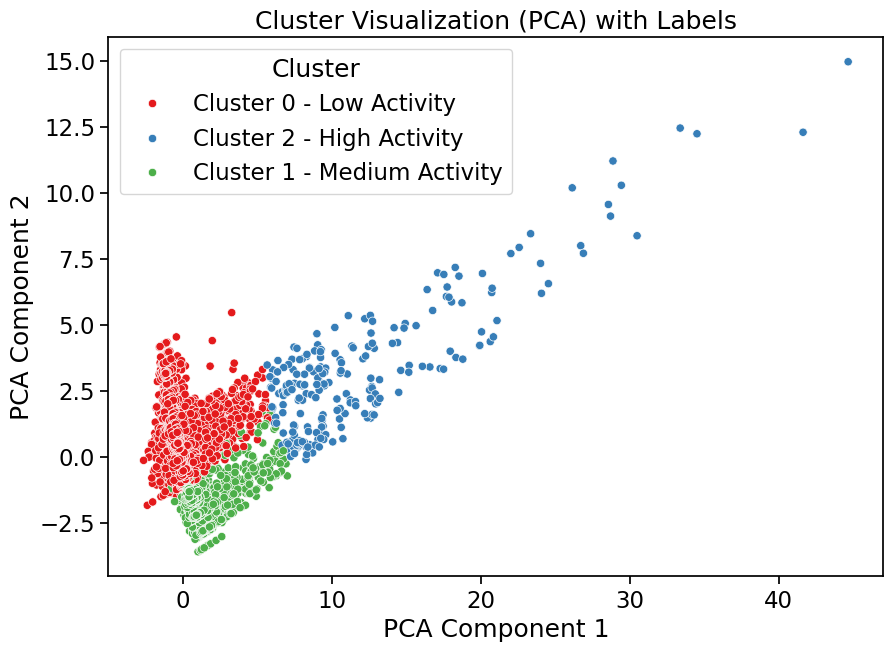

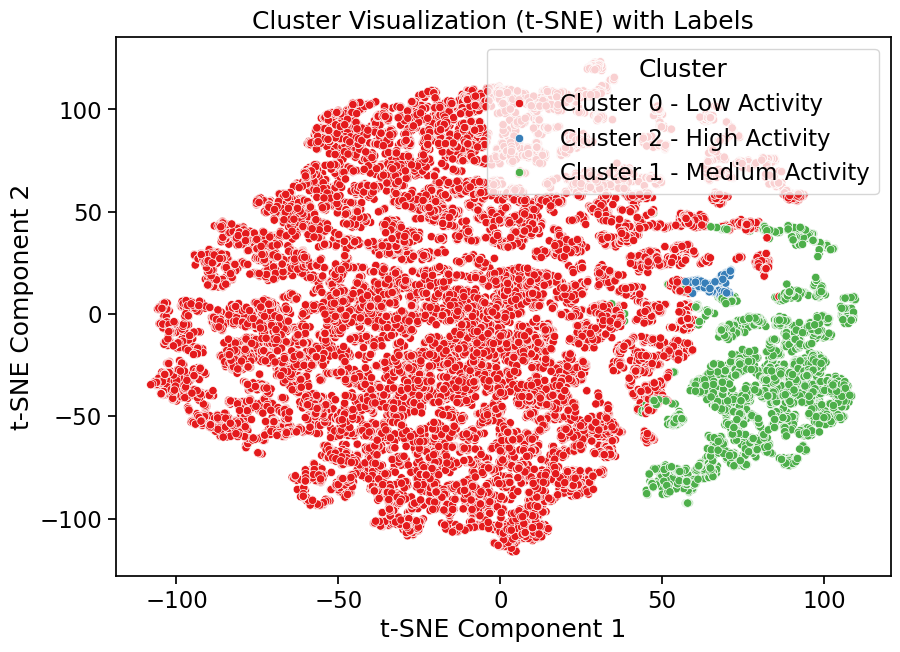

In [36]:
# Cluster summary to understand characteristics of each cluster
cluster_summary = df_relevant.groupby('cluster')[relevant_columns].mean()
print(cluster_summary)

# Assuming we want to label the clusters based on the summary
cluster_labels = {
    0: 'Cluster 0 - Low Activity',
    1: 'Cluster 1 - Medium Activity',
    2: 'Cluster 2 - High Activity'
}

# Map the labels to the cluster column
df_relevant['cluster_label'] = df_relevant['cluster'].map(cluster_labels)

# Display the first few rows to check the labels
print(df_relevant.head())

# Visualization with cluster labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_label', data=df_relevant, palette='Set1')
plt.title('Cluster Visualization (PCA) with Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# t-SNE Visualization with cluster labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster_label', data=df_relevant, palette='Set1')
plt.title('Cluster Visualization (t-SNE) with Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

In [5]:
data.sample(5)

stimulus_presentations_id  cell_specimen_id  \
1050050                       2456        1086502471   
137548                        4297        1086498071   
126722                        3464        1086497438   
664970                        1176        1086491215   
632051                        3896        1086501383   

                                                     trace  \
1050050  [0.0658017173409462, 0.09266236424446106, 0.06...   
137548   [-0.1614498645067215, 0.06290099769830704, -0....   
126722   [0.018658537417650223, 0.07112189382314682, 0....   
664970   [0.05711432918906212, 0.04829774796962738, -0....   
632051   [-0.0037383867893368006, -0.05523471534252167,...   

                                          trace_timestamps  mean_response  \
1050050  [-1.2279671833084949, -1.1956522574319555, -1....       0.004062   
137548   [-1.2281638329897349, -1.195843732121584, -1.1...       0.250592   
126722   [-1.2281638329897349, -1.195843732121584, -1.1...       0.223024   
664970   [-1.2278459028873827, -1.1955341686008727, -1....       0.000278   
632051   [-1.2279815442797712, -1.1956662404829352, -1....       0.147694   

         baseline_response image_name  image_index  is_change  omitted  ...  \
1050050           0.000208    omitted            8      False     True  ...   
137548           -0.139090      im000            0       True    False  ...   
126722           -0.123903      im073            3       True    False  ...   
664970            0.068937    omitted            8      False     True  ...   
632051           -0.087332      im066            2       True    False  ...   

         ophys_session_id  ophys_container_id  behavior_session_id  \
1050050        1010684546          1006386845           1010724655   
137548          994731371           991913453            994743822   
126722          994731371           991913453            994743822   
664970          957189583           941373529            957331258   
632051          993668836           991913246            993691759   

                                         full_genotype  \
1050050  Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
137548   Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
126722   Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
664970   Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
632051   Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   

                      reporter_line     driver_line indicator sex age_in_days  \
1050050  Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   GCaMP6f   M       147.0   
137548   Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   GCaMP6f   M       199.0   
126722   Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   GCaMP6f   M       199.0   
664970   Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   GCaMP6f   F       151.0   
632051   Ai148(TIT2L-GC6f-ICL-tTA2)  [Vip-IRES-Cre]   GCaMP6f   F       129.0   

         exposure_level  
1050050        familiar  
137548         familiar  
126722         familiar  
664970         familiar  
632051            novel  

[5 rows x 31 columns]


##### Available data includes:
*   The cell `trace` aligned to stimulus (or omission) onset in a [-1.25, 1.5] second window around onset time
    *   Cell traces are in units of delta F/F, the change in fluorescence relative to baseline
*   The `trace_timestamps` for each trial, aligned to stimulus or omission onset
*   The `mean_response` on a given trial in a 500ms window after stimulus onset
*   The `baseline_response` on a given trial in a 500ms window before stimulus onset
*   The `image_name` for each trial. Trials where the stimulus was omitted have `image_name` = `omitted`
*   The `mean_running_speed` in a 500ms window after stimulus onset
*   The `mean_pupil_area` in a 500ms window after stimulus onset
*   The `response_latency` when the mouse licked after stimulus onset
*   Whether or not the trial was `rewarded`
*   Whether or not the trial `is_change`
*   Whether or not the trial was `omitted`

#### Cell and session level metadata includes:

*   The `stimulus_presentations_id` indicating the trial number within the session
*   The `cell_specimen_id` which is the unique identifier for each cell (note that a cell can be imaged in multiple sessions; if that's the case, the same cell_specimen_id appears in multiple sessions)
*   The `cre_line` indicating the cell type
  *   `Sst-IRES-Cre` labels SST inhibitory cells
  *   `Vip-IRES-Cre` labels VIP inhibitory cells
  *   `Slc17a7-IRES-Cre` labels excitatory cells
*   The `imaging_depth` indicating the cortical depth where the cell was located
*   The `targeted_structure` indicating the cortical area the cell was from
*   The `session_type` indicating the session order and image set
*   The `exposure_level` which tells you whether the image set was familiar or novel
*   The `mouse_id` indicating which mouse the cell came from
*   The `ophys_session_id` indicating the recording day for that trial
*   The `ophys_experiment_id` indicating which imaging plane within the session that the cell came from
*   The `ophys_container_id` which links the same imaging plane recorded across multiple sessions. Cells that are imaged across multiple sessions will have the same `cell_specimen_id`.




### Let's check what is available


In [6]:
print('exposure_levels:', data.exposure_level.unique())

exposure_levels: ['familiar' 'novel']


In [7]:
print('stimulus presentations can be changes:', data.is_change.unique())

stimulus presentations can be changes: [ True False]


In [8]:
print('stimulus presentations can be omitted:', data.omitted.unique())

stimulus presentations can be omitted: [False  True]


In [9]:
print('cre lines (cell types) included in this dataset are:', data.cre_line.unique())

cre lines (cell types) included in this dataset are: ['Sst-IRES-Cre' 'Vip-IRES-Cre']


In [10]:
print('there are', len(data.mouse_id.unique()), 'mice in this dataset')

there are 13 mice in this dataset


In [11]:
print('there are', len(data.ophys_session_id.unique()), 'sessions in this dataset')

there are 25 sessions in this dataset



# How are VIP and SST cells affected by stimulus novelty?

### Plot the population average change response for familiar and novel images for each cre line

Get trials where the image identity changed, for SST and VIP cells

In [12]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.is_change == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.is_change == True)]

Plot the population average change response of SST cells for familiar and novel images

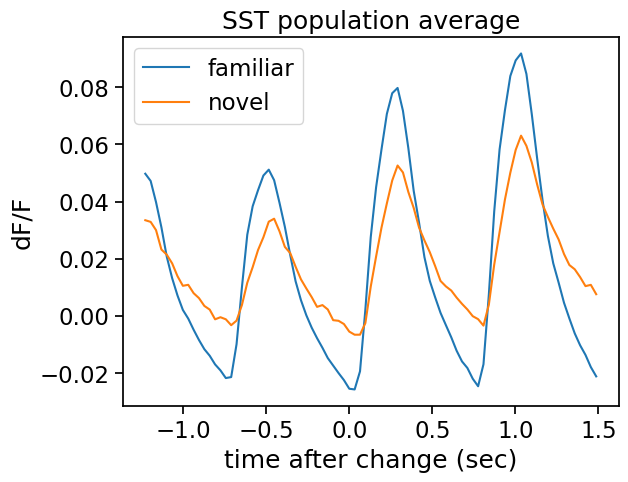

In [13]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
  traces = sst_data[sst_data.exposure_level==exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Plot the population average change response of VIP cells for familiar and novel images

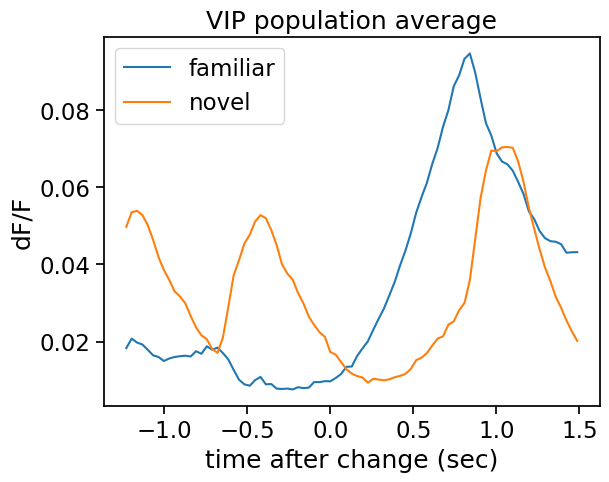

In [39]:
timestamps = vip_data.trace_timestamps.values[0]
for exposure_level in vip_data.exposure_level.unique():
  traces = vip_data[vip_data.exposure_level==exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

### Can you find cells that were imaged across multiple sessions? How do single cells change depending on the image set?

In [15]:
# which cells are in more than one session? make a list
cells_in_multiple_sessions = []
for cell_specimen_id in vip_data.cell_specimen_id.unique():
  if len(vip_data[vip_data.cell_specimen_id == cell_specimen_id].ophys_session_id.unique()) > 1:
    cells_in_multiple_sessions.append(cell_specimen_id)

print(cells_in_multiple_sessions)

[1086495458, 1086495538, 1086495170, 1086495264, 1086496225, 1086495925, 1086495377, 1086496359, 1086496472, 1086496547, 1086496681, 1086497031, 1086496844, 1086500839, 1086500898, 1086500959, 1086501038, 1086501134, 1086501280, 1086501226, 1086501454, 1086501538, 1086501601, 1086501688, 1086489847, 1086489860, 1086489891, 1086558904, 1086556416, 1086555432, 1086559188, 1086555190, 1086567589, 1086559446, 1086567897, 1086558341, 1086556696, 1086561830, 1086557997, 1086559782, 1086560048, 1086567017, 1086557082, 1086556094, 1086563032, 1086563829, 1086560926, 1086561466, 1086562430, 1086560592, 1086566230, 1086566746, 1086563384, 1086562780, 1086565528, 1086497765, 1086498401, 1086498125, 1086499101, 1086498544, 1086498699, 1086498800, 1086498889, 1086498976]


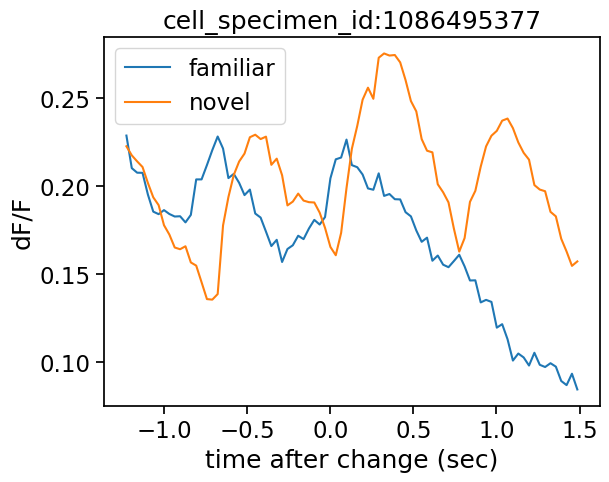

In [16]:
# this one looks like the population average
example_cell_specimen_id = cells_in_multiple_sessions[6]

cell_data = vip_data[vip_data.cell_specimen_id == example_cell_specimen_id]
timestamps = cell_data.trace_timestamps.values[0]
for exposure_level in cell_data.exposure_level.unique():
  mean_trace = cell_data[cell_data.exposure_level == exposure_level].trace.mean()
  plt.plot(timestamps, mean_trace, label=exposure_level)
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

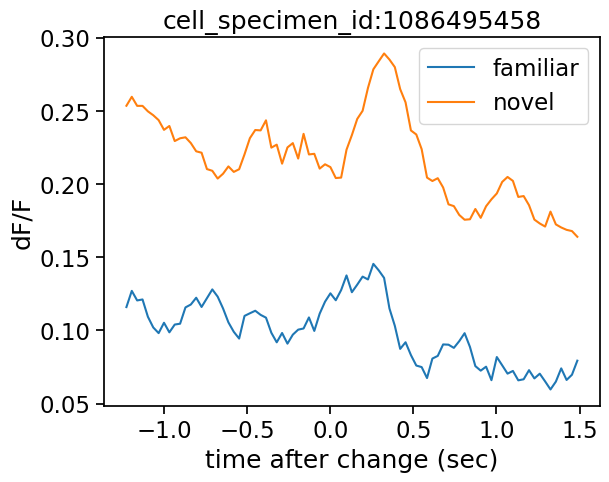

In [17]:
# this one does not look like the population average
example_cell_specimen_id = cells_in_multiple_sessions[0]

cell_data = vip_data[vip_data.cell_specimen_id==example_cell_specimen_id]
timestamps = cell_data.trace_timestamps.values[0]
for exposure_level in cell_data.exposure_level.unique():
  mean_trace = cell_data[cell_data.exposure_level == exposure_level].trace.mean()
  plt.plot(timestamps, mean_trace, label=exposure_level)
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

### What about trial to trial variability? How does the response of a single cell vary across a session?



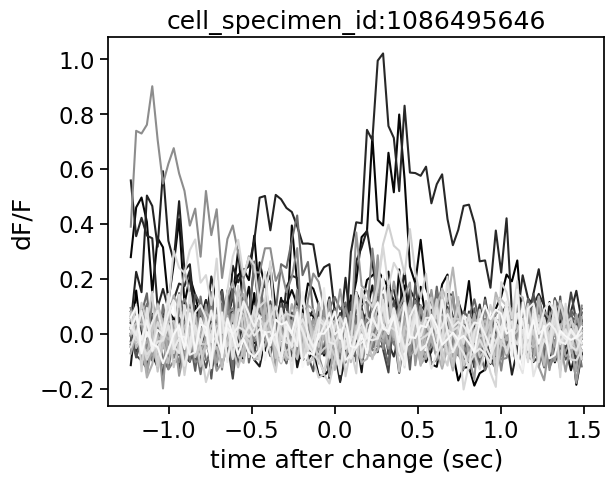

In [18]:
# let's pick a cell from a novel image session
example_cell_specimen_id = vip_data[vip_data.exposure_level=='novel'].cell_specimen_id.unique()[7]

cell_data = vip_data[vip_data.cell_specimen_id == example_cell_specimen_id]
cell_data = cell_data[(cell_data.image_name == cell_data.image_name.unique()[2])]

offset = 1 / len(cell_data.stimulus_presentations_id.unique())
color = [0, 0, 0]

for i, stimulus_presentations_id in enumerate(cell_data.stimulus_presentations_id.unique()):
  trial_data = cell_data[cell_data.stimulus_presentations_id == stimulus_presentations_id]
  timestamps = trial_data.trace_timestamps.values[0]
  trace = trial_data.trace.values[0]
  plt.plot(timestamps, trace, color = color)
  color = [color[0] + offset, color[1] + offset, color[2] + offset]
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.show()

# How do SST and VIP cells respond when stimuli are omitted?¶

### Plot the population average response to stimulus omission

Get trials where the stimulus was omitted, for SST and VIP cells

In [19]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.omitted == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.omitted == True)]

Plot the population average omission response of SST cells for familiar and novel images

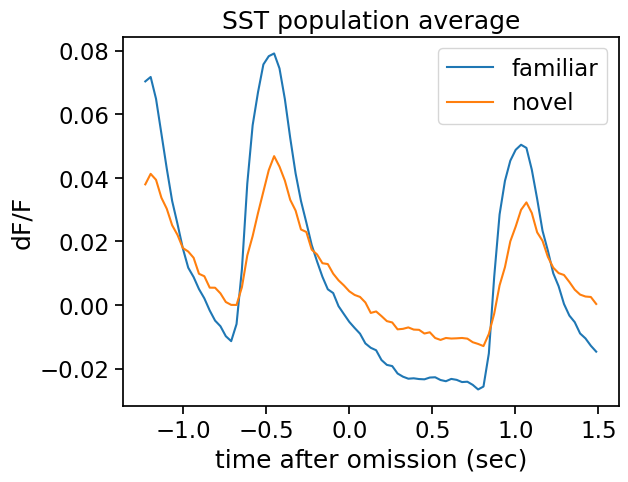

In [20]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
  traces = sst_data[sst_data.exposure_level == exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Plot population average omission response of VIP cells for familiar and novel images

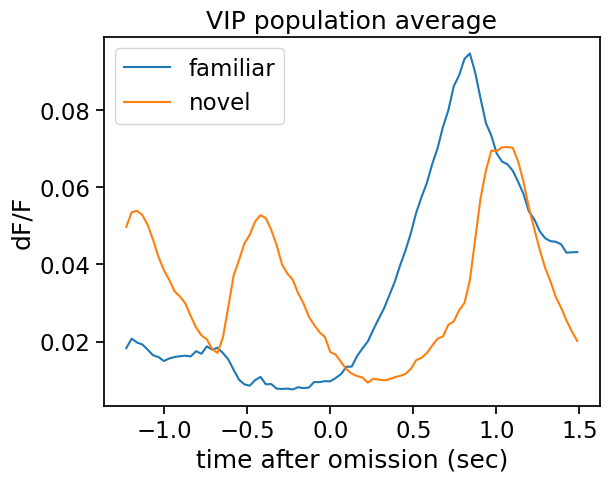

In [21]:
timestamps = vip_data.trace_timestamps.values[0]  # trace timestamps are relative to stimulus onset
for exposure_level in vip_data.exposure_level.unique():
  traces = vip_data[vip_data.exposure_level == exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Does the omission response correlate with behavior?

How do the dynamics of image and omission evoked activity change over time during the novel image session?

### To learn how to use the AllenSDK to access the full dataset, and see more in depth examples of how to interact with the data, check out the additional tutorials here:

https://colab.research.google.com/drive/163dPehppRK6JeHypgfB3gyaGQqKshNQc?usp=sharing

and in the 'Getting Started' section here:

https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html


